# Guided Project: Star Wars Survey

While waiting for *Star Wars: The Force Awakens* to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import Markdown as md

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")

`RespondentID` — An anonymized ID for the respondent (person taking the survey)\
`Gender` — the respondent's gender\
`Age` — the respondent's age\
`Household Income` — the respondent's income\
`Education` — the respondent's education level\
`Location (Census Region)` — the respondent's location\
`Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response\
`Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

- There are several column names that are abnormally coded as "unnamed".
- All fields except for the ID and whether they have seen the six movies have missing values

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
star_wars['Gender'].value_counts(dropna = False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

In [9]:
star_wars['Age'].value_counts(dropna = False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

In [10]:
star_wars['Household Income'].value_counts(dropna = False)

NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [11]:
star_wars['Education'].value_counts(dropna = False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [12]:
star_wars['Location (Census Region)'].value_counts(dropna = False)

East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

## Cleaning and Mapping Yes/No Column

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the pandas.Series.map() method on series objects to perform the conversion.

In [13]:
yes_no = {
    'Yes':True,
    'No': False
}

In [14]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars[
'Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [15]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

In [16]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [17]:
movie_cols = star_wars.columns[3:9]
movie_cols

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [18]:
star_war_movies = list(star_wars.iloc[0, 3:9])
star_war_movies

['Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [19]:
for col, movie in zip(movie_cols, star_war_movies):
    
    movie_map = {movie: True, 
                np.nan: False}
    star_wars[col] = star_wars[col].map(movie_map)  

In [20]:
updated_movie_cols = ['seen_' + str(i) for i in range(1,7)]

col_names = list(star_wars.columns)
col_names[3:9] = updated_movie_cols 
star_wars.columns = col_names 

In [21]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [22]:
star_wars['seen_1'].value_counts(dropna = False)

True     673
False    513
Name: seen_1, dtype: int64

## Cleaning the Ranking Columns

In [23]:
rank_cols = star_wars.columns[9:15]
rank_cols

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [24]:
star_wars[rank_cols] = star_wars[rank_cols].astype(float)
star_wars[rank_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  835 non-null    float64
 1   Unnamed: 10                                                                                                                                    836 non-null    float64
 2   Unnamed: 11                                                                                                                                    835 non-null    float64
 3   Unnamed: 12                  

In [25]:
updated_rank_cols = ['ranking_' + str(i) for i in range(1,7)]

col_names = list(star_wars.columns)
col_names[9:15] = updated_rank_cols 
star_wars.columns = col_names 

In [26]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [27]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

## Finding the Highest-Ranked Movie

In [28]:
star_wars[updated_rank_cols].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

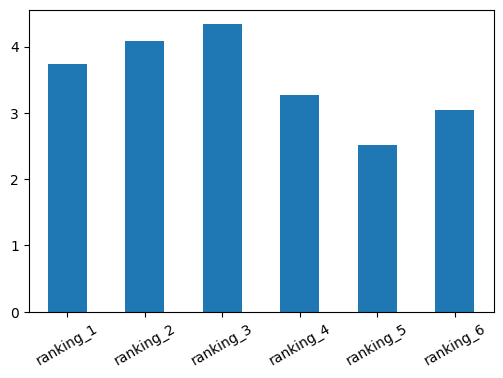

In [29]:
%matplotlib inline
star_wars[updated_rank_cols].mean().plot(kind = 'bar', rot = 30)

In [30]:
# 1 means the film was the most favorite, and 6 means it was the least favorite.
md('So it appears the highest ranked movie in the Star War series is {}'.format(star_war_movies[4]))

So it appears the highest ranked movie in the Star War series is Star Wars: Episode V The Empire Strikes Back

## Finding the Most Viewed Movie

In [31]:
star_wars[updated_movie_cols].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

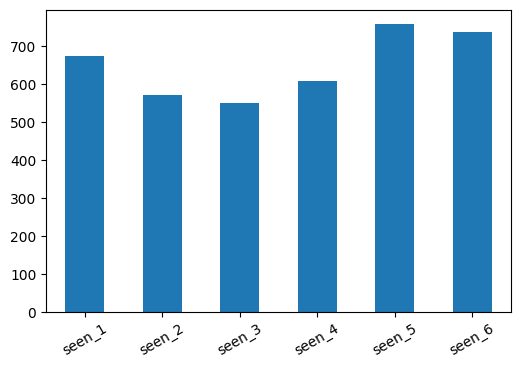

In [32]:
star_wars[updated_movie_cols].sum().plot(kind = 'bar', rot = 30)

In [33]:
star_wars.corr().loc[updated_movie_cols, updated_rank_cols]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
seen_1,0.067218,0.013792,-0.067711,-0.146503,0.066301,0.079381
seen_2,0.246639,0.041711,-0.102122,-0.160216,-0.014686,-0.002038
seen_3,0.308085,0.134838,-0.181001,-0.147843,-0.049921,-0.053451
seen_4,0.440301,0.365598,0.174842,-0.554932,-0.136834,-0.143364
seen_5,0.385813,0.388224,0.248817,-0.130101,-0.422226,-0.368499
seen_6,0.431521,0.391197,0.237803,-0.159497,-0.272718,-0.509609


It seems that the recent movies, episode V and VI, have received more views, which is consistent with their higher rankings (a negative correlation with avg. ranking value).

## Exploring the Data by Binary Segments

In [34]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna = False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [35]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = star_wars[
'Do you consider yourself to be a fan of the Star Trek franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna = False)

False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [36]:
segment_cols = ['Gender', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 
                'Do you consider yourself to be a fan of the Star Trek franchise?']

### By Gender

In [37]:
star_war_movies = [re.split(r'[VI] ', m)[-1].strip() for m in star_war_movies]
star_war_movies

['The Phantom Menace',
 'Attack of the Clones',
 'Revenge of the Sith',
 'A New Hope',
 'The Empire Strikes Back',
 'Return of the Jedi']

In [38]:
views_by_gender = star_wars.groupby(segment_cols[0])[updated_movie_cols].mean()
views_by_gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665
Male,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672


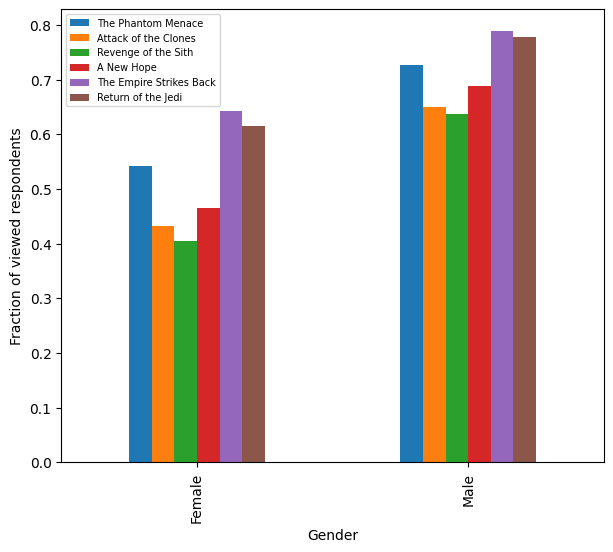

In [39]:
fig, ax = plt.subplots()

views_by_gender.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Fraction of viewed respondents')
ax.legend(star_war_movies, prop = {'size': 7})

In [40]:
total_views_by_gender = star_wars.groupby(segment_cols[0])[updated_movie_cols].sum()
total_views_by_gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,298.0,237.0,222.0,255.0,353.0,338.0
Male,361.0,323.0,317.0,342.0,392.0,387.0


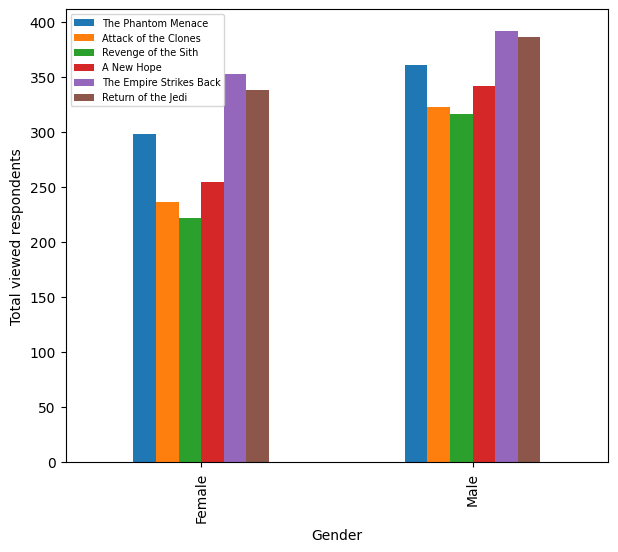

In [41]:
fig, ax = plt.subplots()

total_views_by_gender.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Total viewed respondents')
ax.legend(star_war_movies, prop = {'size': 7})

In [42]:
rankings_by_gender = star_wars.groupby(segment_cols[0])[updated_rank_cols].mean()
rankings_by_gender

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


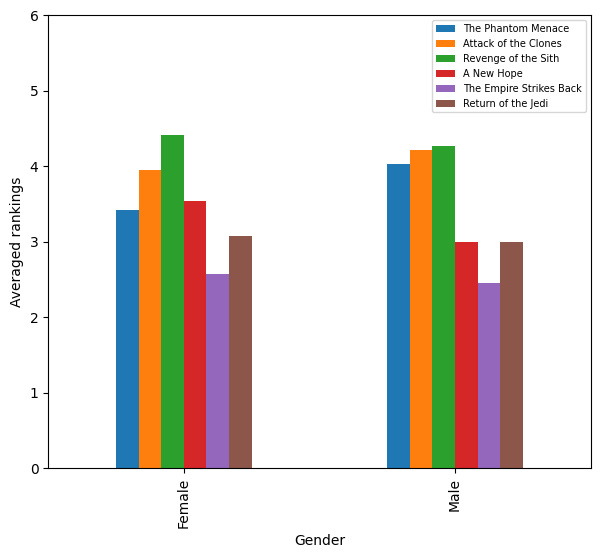

In [43]:
fig, ax = plt.subplots()

rankings_by_gender.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Averaged rankings')
plt.ylim([0,6])
ax.legend(star_war_movies, prop = {'size': 7})

### By fan of the Star Wars film franchise

In [44]:
views_by_star_war = star_wars.groupby(segment_cols[1])[updated_movie_cols].mean()
views_by_star_war

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,0.609155,0.380282,0.352113,0.43662,0.774648,0.707746
True,0.905797,0.838768,0.815217,0.87500,0.974638,0.972826


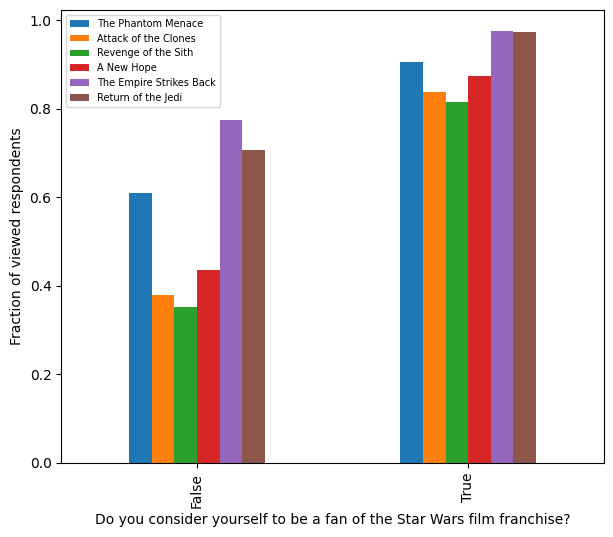

In [45]:
fig, ax = plt.subplots()

views_by_star_war.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Fraction of viewed respondents')
ax.legend(star_war_movies, prop = {'size': 7})

In [46]:
rankings_by_star_war = star_wars.groupby(segment_cols[1])[updated_rank_cols].mean()
rankings_by_star_war

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,2.936396,3.591549,4.193662,3.933099,2.862676,3.471831
True,4.141304,4.342391,4.417423,2.932971,2.333333,2.829710


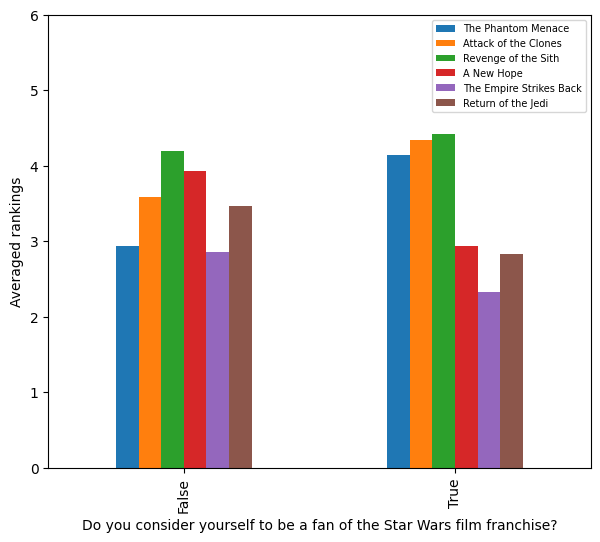

In [47]:
fig, ax = plt.subplots()

rankings_by_star_war.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Averaged rankings')
plt.ylim([0,6])
ax.legend(star_war_movies, prop = {'size': 7})

As expected, those who consider themselves to be fans of Star Wars movies are more likely to have seen an episode than those who don't.\
Interestingly, the fans are more satisfied with the later episodes whereas less preferences are observed for the non-fan viewers.

### By fan of the Star Trek franchise

In [48]:
views_by_star_trek = star_wars.groupby(segment_cols[2])[updated_movie_cols].mean()
views_by_star_trek

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,
False,0.469579,0.355694,0.344774,0.402496,0.550702,0.521061
True,0.852459,0.786885,0.754098,0.800937,0.929742,0.927400


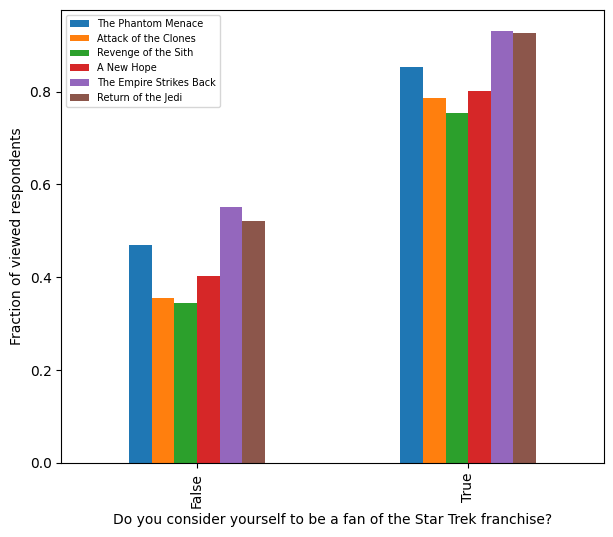

In [49]:
fig, ax = plt.subplots()

views_by_star_trek.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Fraction of viewed respondents')
ax.legend(star_war_movies, prop = {'size': 7})

In [50]:
rankings_by_star_trek = star_wars.groupby(segment_cols[2])[updated_rank_cols].mean()
rankings_by_star_trek

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,
False,3.487864,3.915254,4.278450,3.433414,2.634383,3.244552
True,3.968675,4.255422,4.403382,3.110843,2.407229,2.850602


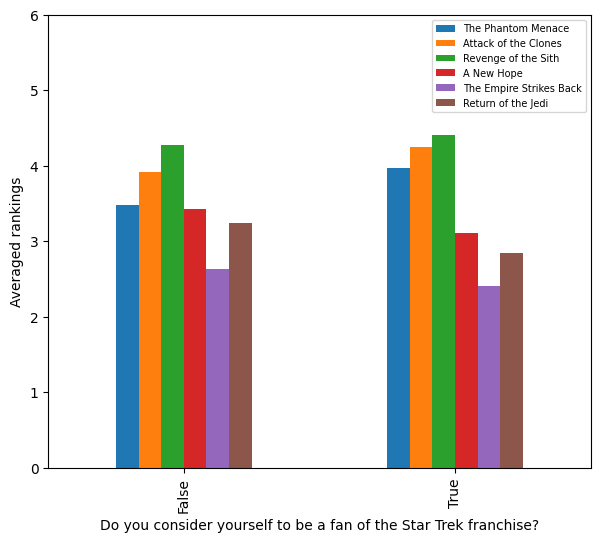

In [51]:
fig, ax = plt.subplots()

rankings_by_star_trek.plot.bar(figsize = (7,6), ax = ax)
plt.ylabel('Averaged rankings')
plt.ylim([0,6])
ax.legend(star_war_movies, prop = {'size': 7})

Intriguingly, those who responded as fans for the Star Trek franchise show very similar opinion on the ranking of the Star Wars movies.

In [52]:
star_war_fans = star_wars[segment_cols[1]].sum()
star_trek_fans = star_wars[segment_cols[2]].sum()
both_fans = ((star_wars[segment_cols[1]]) & (star_wars[segment_cols[2]])).sum()

In [53]:
print('Fans of Star Wars: {:.2f} %\nFans of Star Trek: {:.2f} %\nFans of both: {:.2f} %'.format(
star_war_fans/star_wars.shape[0]*100,
star_trek_fans/star_wars.shape[0]*100,
both_fans/star_wars.shape[0]*100))

Fans of Star Wars: 46.54 %
Fans of Star Trek: 36.00 %
Fans of both: 31.20 %


So it appears that there is a large fraction of overlapping between the fans of both franchise and thus leads to the similar results on the ranking of Star Wars movies.